### Covid Sector Analysis 

In this notebook we further examine some of the elements of the S&P 500. More specifically, we want to find out which securities have gained the most in value and lost the most in value during the Covid period. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt

/tmp/ipykernel_24230/1247152548.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# reading in the data
sp500_volatile_df = pd.read_csv('S&P_500_volatile_predictions_index.csv')
sp500_volatile_df

,Date,Symbol,Name,GICS Sector,GICS Sub-Industry,S&P 500 Log Return,S&P 500 Log Return Cumulative,Predicted S&P 500 Log Return,Predicted S&P 500 Log Return Cumulative,Actual - Predicted,Actual - Predicted Cumulative,S&P 500 Index Log Return,S&P 500 Index Log Return Cumulative,Return Beta,Constant,R2,Return p value
0,2020-03-09,A,Agilent Technologies Inc,Health Care,Health Care Equipment,-0.104710,-0.104710,-0.092269,-0.092269,-0.012441,-0.012441,-0.079010,-0.079010,1.166084,-0.000136,0.44,3.925871e-09
1,2020-03-12,A,Agilent Technologies Inc,Health Care,Health Care Equipment,-0.082006,-0.186716,-0.116680,-0.208949,0.034674,0.022233,-0.099945,-0.178955,1.166084,-0.000136,0.44,3.925871e-09
2,2020-03-13,A,Agilent Technologies Inc,Health Care,Health Care Equipment,0.087222,-0.099494,0.103422,-0.105526,-0.016201,0.006032,0.088808,-0.090147,1.166084,-0.000136,0.44,3.925871e-09
3,2020-03-16,A,Agilent Technologies Inc,Health Care,Health Care Equipment,-0.076089,-0.175583,-0.148989,-0.254515,0.072900,0.078933,-0.127652,-0.217799,1.166084,-0.000136,0.44,3.925871e-09
4,2020-03-17,A,Agilent Technologies Inc,Health Care,Health Care Equipment,0.093849,-0.081734,0.067761,-0.186755,0.026088,0.105021,0.058226,-0.159573,1.166084,-0.000136,0.44,3.925871e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-03-18,ZTS,Zoetis,Health Care,Pharmaceuticals,-0.048241,-0.262837,-0.045116,-0.176322,-0.003125,-0.086515,-0.053222,-0.212795,0.885817,0.002029,0.27,1.448793e-05
4996,2020-03-24,ZTS,Zoetis,Health Care,Pharmaceuticals,0.113144,-0.149694,0.081472,-0.094850,0.031671,-0.054844,0.089683,-0.123112,0.885817,0.002029,0.27,1.448793e-05
4997,2020-03-26,ZTS,Zoetis,Health Care,Pharmaceuticals,0.085848,-0.063846,0.055660,-0.039190,0.030188,-0.024656,0.060544,-0.062568,0.885817,0.002029,0.27,1.448793e-05
4998,2020-04-06,ZTS,Zoetis,Health Care,Pharmaceuticals,0.100997,0.037151,0.062237,0.023047,0.038760,0.014105,0.067968,0.005400,0.885817,0.002029,0.27,1.448793e-05


In [3]:
# filtering for final cumulative sums
sp500_volatile_df = sp500_volatile_df[sp500_volatile_df['Date'] == sp500_volatile_df['Date'].max()].reset_index(drop=True)
sp500_volatile_df = sp500_volatile_df.drop(columns=['Date', 
                                                    'S&P 500 Log Return', 
                                                    'Predicted S&P 500 Log Return', 
                                                    'Actual - Predicted',
                                                    'S&P 500 Index Log Return'
                                                   ])
sp500_volatile_df

,Symbol,Name,GICS Sector,GICS Sub-Industry,S&P 500 Log Return Cumulative,Predicted S&P 500 Log Return Cumulative,Actual - Predicted Cumulative,S&P 500 Index Log Return Cumulative,Return Beta,Constant,R2,Return p value
0,A,Agilent Technologies Inc,Health Care,Health Care Equipment,0.017344,-0.065904,0.083248,-0.055352,1.166084,-0.000136,0.44,3.925871e-09
1,AAL,American Airlines Group,Industrials,Airlines,-0.246335,-0.192748,-0.053586,-0.055352,2.778079,-0.003897,0.50,8.870763e-11
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,-0.090070,-0.078147,-0.011923,-0.055352,0.797257,-0.003402,0.07,3.121002e-02
3,AAPL,Apple Inc-,Information Technology,"Technology Hardware, Storage & Peripherals",-0.011347,-0.096834,0.085486,-0.055352,1.874920,0.000695,0.64,2.579127e-15
4,ABBV,AbbVie Inc-,Health Care,Pharmaceuticals,-0.107085,-0.057384,-0.049701,-0.055352,0.980016,-0.000314,0.17,6.899600e-04
...,...,...,...,...,...,...,...,...,...,...,...,...
495,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,-0.035686,-0.032932,-0.002754,-0.055352,0.639868,0.000249,0.16,1.066138e-03
496,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,-0.285716,-0.061557,-0.224160,-0.055352,1.101614,-0.000058,0.34,6.312214e-07
497,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,0.002829,-0.096428,0.099257,-0.055352,1.438270,-0.001682,0.25,3.211496e-05
498,ZION,Zions Bancorp,Financials,Regional Banks,-0.113547,-0.101640,-0.011906,-0.055352,1.305325,-0.002939,0.32,1.116513e-06


In [6]:
# getting top 10 and bottom 10 abnormal returns (Actual - Predicted Cumulative)
top10_abnormal = sp500_volatile_df.nlargest(10, 'Actual - Predicted Cumulative').reset_index(drop=True)
bottom10_abnormal = sp500_volatile_df.nsmallest(10, 'Actual - Predicted Cumulative').reset_index(drop=True)

print("top 10 -> companies that gained more than predicted during covid")
# display(top10_abnormal)
top10_formatted = top10_abnormal.drop(columns = ['S&P 500 Log Return Cumulative',
                                                 'Predicted S&P 500 Log Return Cumulative',
                                                 'S&P 500 Index Log Return Cumulative',
                                                 'Return Beta',
                                                 'Constant'
                                                ])

top10_formatted = top10_formatted.rename(columns={'Return p value':'p value',
                                                  'Actual - Predicted Cumulative': 'Cumulative Abnormal Return'
                                                 })
top10_formatted['Cumulative Abnormal Return'] = top10_formatted['Cumulative Abnormal Return'].round(3)
top10_formatted['R2'] = top10_formatted['R2'].round(2)
top10_formatted['p value'] = top10_formatted['p value'].apply(lambda x: '%.2g' % x)
top10_formatted = top10_formatted.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
top10_formatted.set_properties(**{'text-align': 'center'}).hide()
display(top10_formatted)

print("\n\n\nbottom 10 -> companies that lost more than predicted during covid")
# display(bottom10_abnormal)
bottom10_formatted = bottom10_abnormal.drop(columns = ['S&P 500 Log Return Cumulative',
                                                     'Predicted S&P 500 Log Return Cumulative',
                                                     'S&P 500 Index Log Return Cumulative',
                                                     'Return Beta',
                                                     'Constant'
                                                    ])

bottom10_formatted = bottom10_formatted.rename(columns={'Return p value':'p value',
                                                  'Actual - Predicted Cumulative': 'Cumulative Abnormal Return'
                                                 })
bottom10_formatted['Cumulative Abnormal Return'] = bottom10_formatted['Cumulative Abnormal Return'].round(3)
bottom10_formatted['R2'] = bottom10_formatted['R2'].round(2)
bottom10_formatted['p value'] = bottom10_formatted['p value'].apply(lambda x: '%.2g' % x)
bottom10_formatted = bottom10_formatted.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
bottom10_formatted.set_properties(**{'text-align': 'center'}).hide()
display(bottom10_formatted)

top 10 -> companies that gained more than predicted during covid


Symbol,Name,GICS Sector,GICS Sub-Industry,Cumulative Abnormal Return,R2,p value
COG,Cabot Oil & Gas,Energy,Oil & Gas Exploration & Production,0.498000,0.140000,0.0028
IPGP,IPG Photonics Corp-,Information Technology,Electronic Manufacturing Services,0.353000,0.370000,1.4e-07
KLAC,KLA Corporation,Information Technology,Semiconductor Equipment,0.329000,0.390000,3.9e-08
PBCT,People's United Financial,Financials,Thrifts & Mortgage Finance,0.274000,0.350000,3.1e-07
WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail,0.271000,0.130000,0.0039
WEC,WEC Energy Group,Utilities,Electric Utilities,0.270000,0.010000,0.43
ABC,AmerisourceBergen Corp,Health Care,Health Care Distributors,0.265000,0.330000,7.9e-07
ORCL,Oracle Corp-,Information Technology,Application Software,0.262000,0.400000,3.3e-08
NTAP,NetApp,Information Technology,"Technology Hardware, Storage & Peripherals",0.239000,0.280000,1e-05
UPS,United Parcel Service,Industrials,Air Freight & Logistics,0.235000,0.200000,0.00022





bottom 10 -> companies that lost more than predicted during covid


Symbol,Name,GICS Sector,GICS Sub-Industry,Cumulative Abnormal Return,R2,p value
OKE,ONEOK,Energy,Oil & Gas Storage & Transportation,-1.219000,0.220000,9.3e-05
APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,-1.127000,0.050000,0.076
FANG,Diamondback Energy,Energy,Oil & Gas Exploration & Production,-0.884000,0.170000,0.00066
SPG,Simon Property Group Inc,Real Estate,Retail REITs,-0.802000,0.150000,0.0017
OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,-0.789000,0.150000,0.002
HAL,Halliburton Co-,Energy,Oil & Gas Equipment & Services,-0.763000,0.210000,0.00014
VTR,Ventas Inc,Real Estate,Health Care REITs,-0.736000,0.010000,0.57
UAL,United Airlines Holdings,Industrials,Airlines,-0.696000,0.540000,9.2e-12
MRO,Marathon Oil Corp-,Energy,Oil & Gas Exploration & Production,-0.653000,0.190000,0.00032
RCL,Royal Caribbean Group,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-0.651000,0.370000,1.2e-07


In [8]:
# selecting big tech companies
companies = ['AMZN', 'AAPL', 'MSFT', 'FB', 'GOOG', 'GOOGL']
big_tech_abnormal = sp500_volatile_df[sp500_volatile_df['Symbol'].isin(companies)].reset_index(drop=True)
# display(big_tech_abnormal)

tech_formatted = big_tech_abnormal.drop(columns = ['S&P 500 Log Return Cumulative',
                                                 'Predicted S&P 500 Log Return Cumulative',
                                                 'S&P 500 Index Log Return Cumulative',
                                                 'Return Beta',
                                                 'Constant'
                                                ])

tech_formatted = tech_formatted.rename(columns={'Return p value':'p value',
                                                  'Actual - Predicted Cumulative': 'Cumulative Abnormal Return'
                                                 })
tech_formatted['Cumulative Abnormal Return'] = tech_formatted['Cumulative Abnormal Return'].round(3)
tech_formatted['R2'] = tech_formatted['R2'].round(2)
tech_formatted['p value'] = tech_formatted['p value'].apply(lambda x: '%.2g' % x)
tech_formatted = tech_formatted.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
tech_formatted.set_properties(**{'text-align': 'center'}).hide()
display(tech_formatted)

Symbol,Name,GICS Sector,GICS Sub-Industry,Cumulative Abnormal Return,R2,p value
AAPL,Apple Inc-,Information Technology,"Technology Hardware, Storage & Peripherals",0.085000,0.640000,2.6e-15
AMZN,Amazon-com Inc-,Consumer Discretionary,Internet & Direct Marketing Retail,0.005000,0.020000,0.29
FB,"Facebook, Inc-",Communication Services,Interactive Media & Services,-0.012000,0.180000,0.00053
GOOG,Alphabet Inc- (Class C),Communication Services,Interactive Media & Services,0.032000,0.270000,1.1e-05
GOOGL,Alphabet Inc- (Class A),Communication Services,Interactive Media & Services,0.035000,0.280000,9.2e-06
MSFT,Microsoft Corp-,Information Technology,Systems Software,0.060000,0.520000,2.1e-11


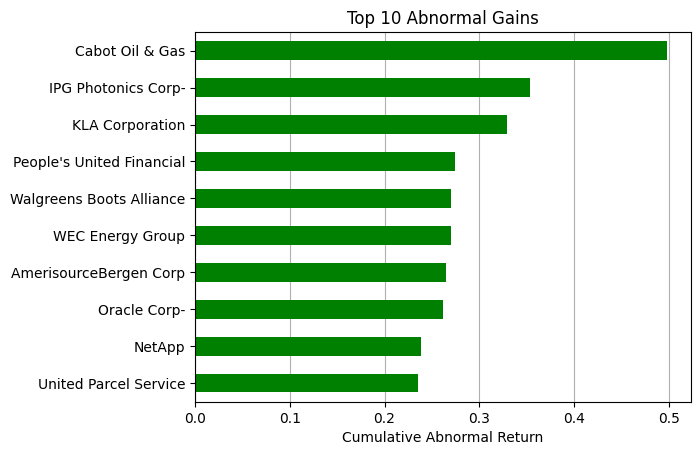

In [9]:
ax = top10_abnormal.plot.barh(title='Top 10 Abnormal Gains', 
                              x='Name', 
                              y='Actual - Predicted Cumulative', 
                              legend=False,
                              color='g'
                             )
ax.grid(axis='x')
ax.set_axisbelow(True)
plt.xlabel("Cumulative Abnormal Return")
plt.ylabel("")
plt.gca().invert_yaxis()

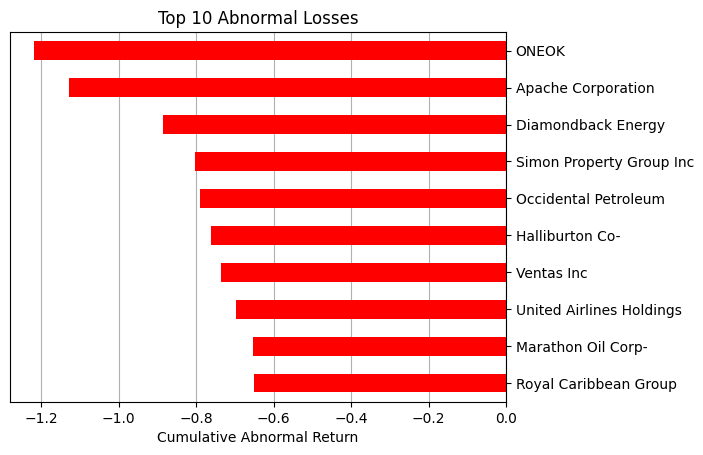

In [10]:
ax = bottom10_abnormal.plot.barh(title='Top 10 Abnormal Losses', 
                                 x='Name', 
                                 y='Actual - Predicted Cumulative', 
                                 legend=False,
                                 color='r'
                                )
ax.yaxis.tick_right()
ax.grid(axis='x')
ax.set_axisbelow(True)
plt.xlabel("Cumulative Abnormal Return")
plt.ylabel("")
plt.gca().invert_yaxis()

### Sector Analysis

We want to examine certain ETFs that track sectors in the S&P 500 to ascertain some information. Namely, which sector had the highest total return, lowest total return, the best and worst days for the sectors examined and most volatile sector. 

We examine the following: 

S&P Consumer Staples Select Sector (XLP)


S&P Energy Select Sector (XLE)

S&P Financial Select Sector (XLF)


S&P Technology Select Sector (XLK)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/tmp/ipykernel_38376/2536035061.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Goal: Read eash CSV into a new DataFrame
XLP = pd.read_csv('XLP.csv')
XLE = pd.read_csv('XLE.csv')
XLF = pd.read_csv('XLF.csv')
XLK = pd.read_csv('XLK.csv')

In [3]:
# Goal: Reset the index of each df to the "Date" column

# Let's make a list of each df so that we can iterate through it
funds = [XLP,XLE,XLF,XLK]

# For each df, reset the index
for fund in funds:
    fund.set_index('Date',inplace=True)

In [4]:
# Goal: Concatenate all of the dfs into one new df

# We will use this string of symbols as keys in our new df
tickers = ['XLP','XLE','XLF','XLK']

# Let's concatenate the indidvudal dfs into a new df called "all_funds"
all_funds = pd.concat([XLP,XLE,XLF,XLK],axis=1,keys=tickers,sort=False)

In [5]:
all_funds.head()


XLP                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2016-06-21  53.709999  53.919998  53.689999  53.779999  47.228245   6879100   
2016-06-22  53.849998  54.000000  53.750000  53.810001  47.254597   5408300   
2016-06-23  54.020000  54.139999  53.869999  54.139999  47.544388   5642500   
2016-06-24  53.150002  53.779999  52.880001  53.099998  46.631088  23775900   
2016-06-27  53.020000  53.110001  52.650002  52.990002  46.534473  19305900   

                  XLE                                   ...        XLF  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2016-06-21  67.320000  68.410004  67.120003  68.269997  ...  18.464663   
2016-06-22  68.570000  68.570000  67.830002  67.889999  ...  18.521526   
2016-06-23  68.599998  69.029999  68.339996  69.010002  ...  18.773355   
2016-06-24  66.349998  67.550003  66.290001  66.779999  ...  17.871649   
2016-06-27  65.870003  65.930000  64.110001  64.639999  ...  17.319254   

                                                   XLK                        \
                Close  Adj Close     Volume       Open       High        Low   
Date                                                                           
2016-06-21  18.578392  16.903725   40308110  43.360001  43.630001  43.320000   
2016-06-22  18.562145  16.888941   54005201  43.540001  43.700001  43.330002   
2016-06-23  18.952070  17.243721   73745517  43.660000  44.009998  43.500000   
2016-06-24  17.936638  16.319813  165914672  42.419998  43.139999  42.189999   
2016-06-27  17.424858  15.854169  140642119  41.970001  41.970001  41.259998   

                                            
                Close  Adj Close    Volume  
Date                                        
2016-06-21  43.529999  40.731937   5743900  
2016-06-22  43.380001  40.591583   6495200  
2016-06-23  43.970001  41.143658   9763400  
2016-06-24  42.279999  39.562290  23623000  
2016-06-27  41.430000  38.766933  18409000  

[5 rows x 24 columns]

In [6]:
af_close = pd.DataFrame(all_funds.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1))


In [7]:
af_close.head()


,XLP,XLE,XLF,XLK
,Close,Close,Close,Close
Date,,,,
2016-06-21,53.779999,68.269997,18.578392,43.529999
2016-06-22,53.810001,67.889999,18.562145,43.380001
2016-06-23,54.139999,69.010002,18.952070,43.970001
2016-06-24,53.099998,66.779999,17.936638,42.279999
2016-06-27,52.990002,64.639999,17.424858,41.430000


In [8]:
af_close.columns


MultiIndex([('XLP', 'Close'),
            ('XLE', 'Close'),
            ('XLF', 'Close'),
            ('XLK', 'Close')],
           )

In [9]:
af_close = af_close.droplevel(axis=1,level=1)
af_close.head()

,XLP,XLE,XLF,XLK
Date,,,,
2016-06-21,53.779999,68.269997,18.578392,43.529999
2016-06-22,53.810001,67.889999,18.562145,43.380001
2016-06-23,54.139999,69.010002,18.952070,43.970001
2016-06-24,53.099998,66.779999,17.936638,42.279999
2016-06-27,52.990002,64.639999,17.424858,41.430000


In [10]:
af_close.describe()


,XLP,XLE,XLF,XLK
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,57.698728,60.161018,26.396098,79.365350
std,5.304445,13.568329,3.888662,26.864529
min,48.630001,23.570000,17.424858,41.430000
25%,53.922499,53.147499,23.915000,58.750001
50%,55.700001,65.010002,26.525000,72.224998
75%,61.257499,69.459999,28.257500,93.292499
max,71.519997,78.910004,38.470001,143.429993


<AxesSubplot:xlabel='Date'>

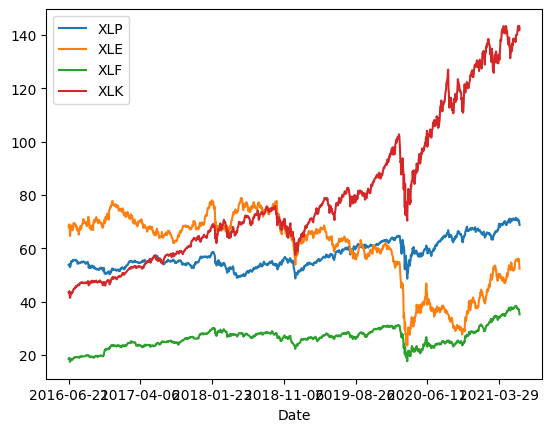

In [11]:
af_close.plot.line()


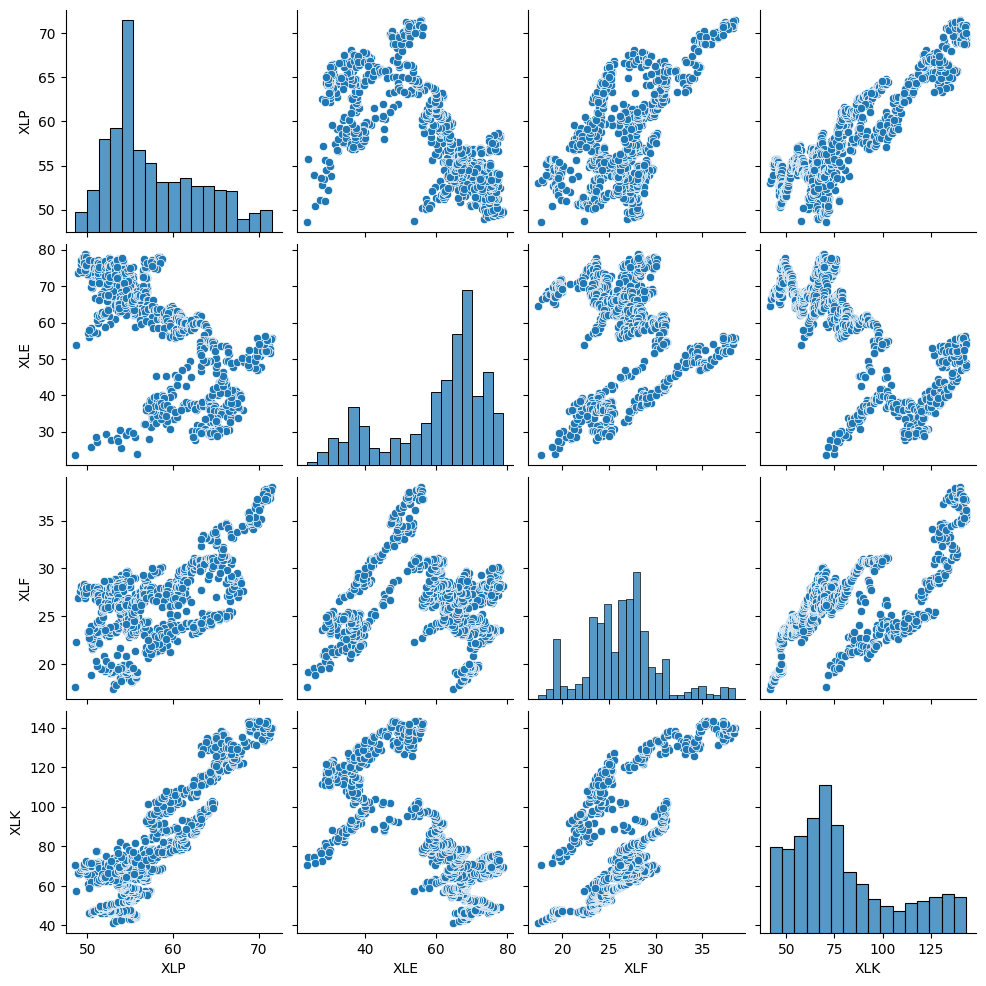

In [12]:
sns.pairplot(af_close)


<AxesSubplot:>

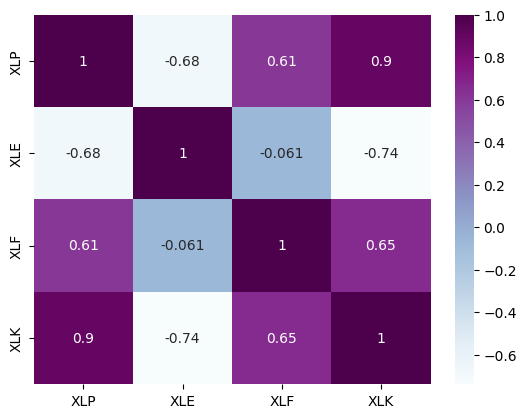

In [13]:
sns.heatmap(af_close.corr(),cmap="BuPu",annot=True)


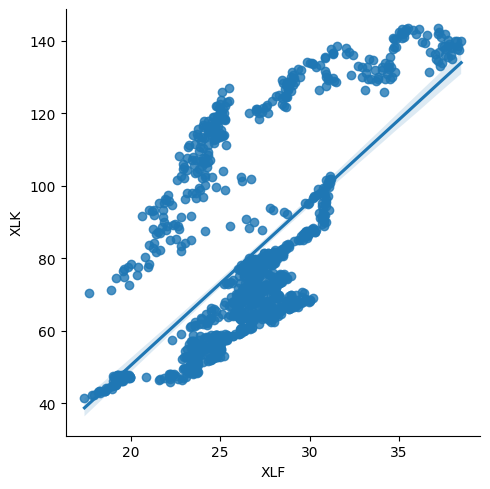

In [14]:
sns.lmplot(x='XLF',y='XLK',data=af_close)


In [15]:
returns = pd.DataFrame()


In [16]:
for tick in tickers:
    returns[tick+' Return'] = af_close[tick].pct_change()

# View our result
returns.head()

,XLP Return,XLE Return,XLF Return,XLK Return
Date,,,,
2016-06-21,NaN,NaN,NaN,NaN
2016-06-22,0.000558,-0.005566,-0.000875,-0.003446
2016-06-23,0.006133,0.016497,0.021006,0.013601
2016-06-24,-0.019209,-0.032314,-0.053579,-0.038435
2016-06-27,-0.002071,-0.032046,-0.028533,-0.020104


<AxesSubplot:xlabel='Date'>

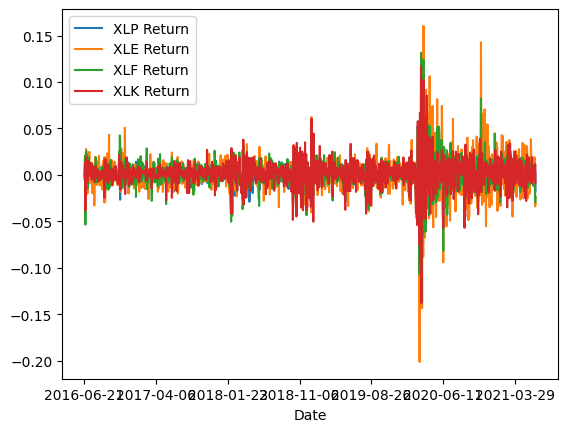

In [17]:
returns.plot.line()


In [20]:
cummulative_return = pd.DataFrame()

In [21]:
for tick in tickers:
    cummulative_return[tick+' Return'] = ((af_close[tick] - af_close[tick].iloc[0]) / af_close[tick].iloc[0] * 100)
cummulative_return.head()       


,XLP Return,XLE Return,XLF Return,XLK Return
Date,,,,
2016-06-21,0.000000,0.000000,0.000000,0.000000
2016-06-22,0.055787,-0.556611,-0.087451,-0.344585
2016-06-23,0.669394,1.083939,2.011358,1.010802
2016-06-24,-1.264412,-2.182508,-3.454303,-2.871583
2016-06-27,-1.468942,-5.317120,-6.209009,-4.824257


<AxesSubplot:xlabel='Date'>

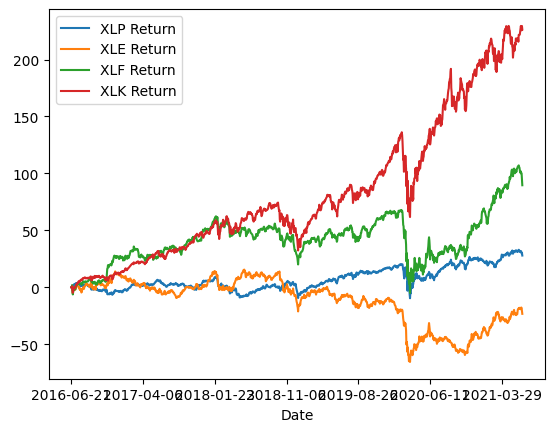

In [22]:
cummulative_return.plot.line()


#### Ascertaining highest and lowest return

In [23]:
# Goal: see the last row of the df

cummulative_return.iloc[-1]

XLP Return     27.928606
XLE Return    -23.260581
XLF Return     89.628898
XLK Return    226.418560
Name: 2021-06-18, dtype: float64

#### Ascertaining most volatile sector 

In [24]:
returns.std()


XLP Return    0.010178
XLE Return    0.020800
XLF Return    0.015971
XLK Return    0.015206
dtype: float64

In [25]:
returns.std()


XLP Return    0.010178
XLE Return    0.020800
XLF Return    0.015971
XLK Return    0.015206
dtype: float64

##### Ascertaining the best and worst day for each sector

In [26]:
returns.idxmax()


XLP Return    2020-03-13
XLE Return    2020-03-24
XLF Return    2020-03-13
XLK Return    2020-03-13
dtype: object

In [27]:
returns.idxmin()

XLP Return    2020-03-12
XLE Return    2020-03-09
XLF Return    2020-03-16
XLK Return    2020-03-16
dtype: object

References: 


(1) https://github.com/josephwysocki/covid_finance/blob/main/FinanceBasics.ipynb


(2) https://github.com/fk652/Big_Data_Project-Fall_2020/blob/main/data-analysis/S%26P500_sector_analysis.ipynb